Q. Can we identify users who have similar viewing habits and recommend anime based on these similarities?

To answer this I am trying to see if I can create cluster of users based on viewing attributes: Completed(Number of animes completed), Rewatched(Number of animes rewatched), and Watching(Number of animes a user is currently watching). Based on this clustering we can suggest anime to a user based on the animes being seen by the other users in the same cluster.

For further attemps at clustering, I am trying 
1. AgglomerativeClustering: This method works well with clusters that are not of any specific shape and size
2. SpectralClustering: This method is also generally used for complex clusters and used in applications like customer segmentation.

https://www.geeksforgeeks.org/ml-spectral-clustering/#
https://medium.com/datadenys/what-is-agglomerative-clustering-and-how-to-use-it-with-python-scikit-learn-7e127ddb148c
https://scikit-learn.org/dev/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
https://scikit-learn.org/dev/modules/generated/sklearn.cluster.spectral_clustering.html#sklearn.cluster.spectral_clustering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MultiLabelBinarizer


cleaned_dataset = pd.read_csv("../../../cleaned_datasets/users_details_dataset_cleaned.csv")

In [20]:
cleaned_dataset.info()
cleaned_dataset = cleaned_dataset.dropna()
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40315 entries, 0 to 41485
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        40315 non-null  int64  
 1   Mal ID            40315 non-null  int64  
 2   Username          40315 non-null  object 
 3   Gender            40315 non-null  object 
 4   Birthday          40315 non-null  object 
 5   Location          40315 non-null  object 
 6   Joined            40315 non-null  object 
 7   Days Watched      40315 non-null  float64
 8   Mean Score        40315 non-null  float64
 9   Watching          40315 non-null  float64
 10  Completed         40315 non-null  float64
 11  On Hold           40315 non-null  float64
 12  Dropped           40315 non-null  float64
 13  Plan to Watch     40315 non-null  float64
 14  Total Entries     40315 non-null  float64
 15  Rewatched         40315 non-null  float64
 16  Episodes Watched  40315 non-null  float64
 17

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [19]:

data_filtered = cleaned_dataset[['Mal ID', 'Completed', 'Rewatched', 'Watching']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_filtered_scaled = scaler.fit_transform(data_filtered[['Completed', 'Rewatched', 'Watching']])

# Adding the user_id back after scaling (to keep track of users)
data_filtered_scaled = pd.DataFrame(data_filtered_scaled, columns=['Completed', 'Rewatched', 'Watching'])
data_filtered_scaled['Mal ID'] = cleaned_dataset['Mal ID']
data_filtered_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40315 entries, 0 to 40314
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Completed  40315 non-null  float64
 1   Rewatched  40315 non-null  float64
 2   Watching   40315 non-null  float64
 3   Mal ID     39178 non-null  float64
dtypes: float64(4)
memory usage: 1.2 MB


In [23]:
from sklearn.cluster import AgglomerativeClustering

# Fit the Agglomerative model
agg_clust = AgglomerativeClustering(n_clusters=5, linkage='ward')
data_filtered_scaled['Cluster'] = agg_clust.fit_predict(data_filtered_scaled.drop('Mal ID', axis=1))


# Check cluster distribution
print(data_filtered_scaled['Cluster'].value_counts())
data_filtered_scaled.info()

Cluster
1    32895
0     6596
2      499
4      323
3        2
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40315 entries, 0 to 40314
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Completed  40315 non-null  float64
 1   Rewatched  40315 non-null  float64
 2   Watching   40315 non-null  float64
 3   Mal ID     39178 non-null  float64
 4   Cluster    40315 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.5 MB


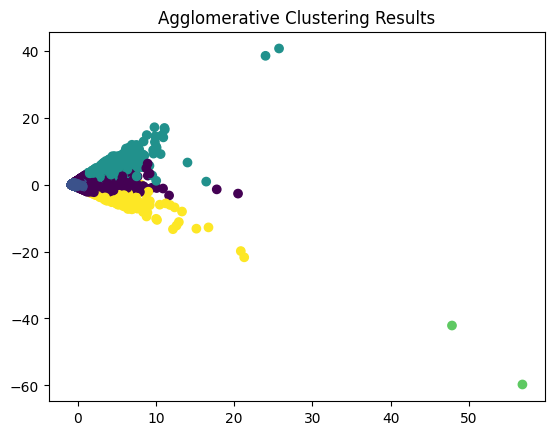

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_filtered_scaled[['Completed', 'Rewatched', 'Watching']])

# Plot the clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data_filtered_scaled['Cluster'], cmap='viridis')
plt.title('Agglomerative Clustering Results')
plt.show()

In [25]:
# We have one cluster with too many value
from sklearn.cluster import AgglomerativeClustering

# Fit the Agglomerative model
agg_clust = AgglomerativeClustering(n_clusters=10, linkage='average')
data_filtered_scaled['Cluster'] = agg_clust.fit_predict(data_filtered_scaled.drop('Mal ID', axis=1))


# Check cluster distribution
print(data_filtered_scaled['Cluster'].value_counts())

Cluster
2    40242
1       42
0       14
4        8
5        2
3        2
6        2
7        1
9        1
8        1
Name: count, dtype: int64


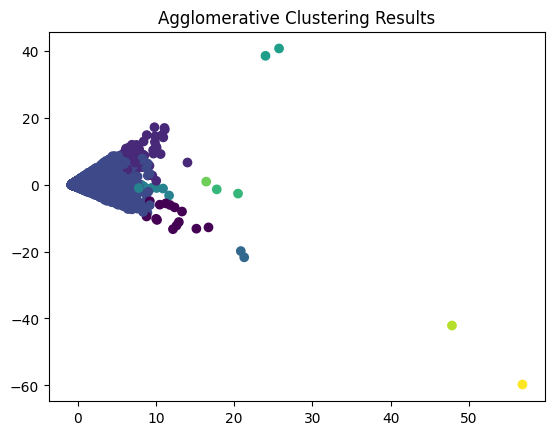

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_filtered_scaled[['Completed', 'Rewatched', 'Watching']])

# Plot the clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data_filtered_scaled['Cluster'], cmap='viridis')
plt.title('Agglomerative Clustering Results')
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering

# Fit the Agglomerative model
agg_clust = AgglomerativeClustering(n_clusters=10, linkage='ward')
data_filtered_scaled['Cluster'] = agg_clust.fit_predict(data_filtered_scaled.drop('Mal ID', axis=1))


# Check cluster distribution
print(data_filtered_scaled['Cluster'].value_counts())

Cluster
0    32470
1     3591
8     1609
6     1494
3      417
5      375
4      311
2       34
9       12
7        2
Name: count, dtype: int64


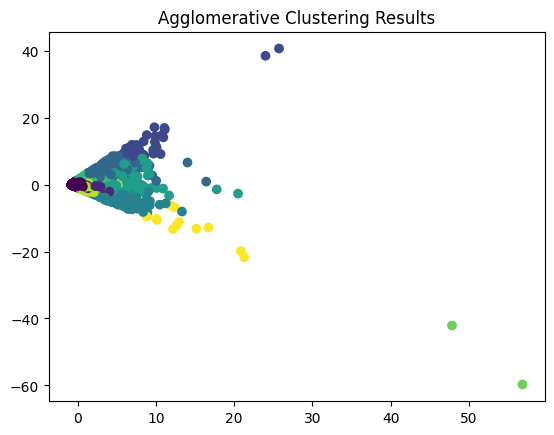

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_filtered_scaled[['Completed', 'Rewatched', 'Watching']])

# Plot the clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data_filtered_scaled['Cluster'], cmap='viridis')
plt.title('Agglomerative Clustering Results')
plt.show()

In [29]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=10, affinity='nearest_neighbors')  # Adjust n_clusters as needed

# Fit the model to the data
spectral.fit(data_filtered_scaled.drop('Mal ID', axis=1))

labels = spectral.labels_
cluster_sizes = pd.Series(labels).value_counts().sort_index()
print("Cluster Sizes:", cluster_sizes)

/Users/ramachandrank/Repos/MS/sem1/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Cluster Sizes: 0    38277
1       30
2       16
3       22
4      382
5       30
6      959
7       32
8       22
9      545
Name: count, dtype: int64


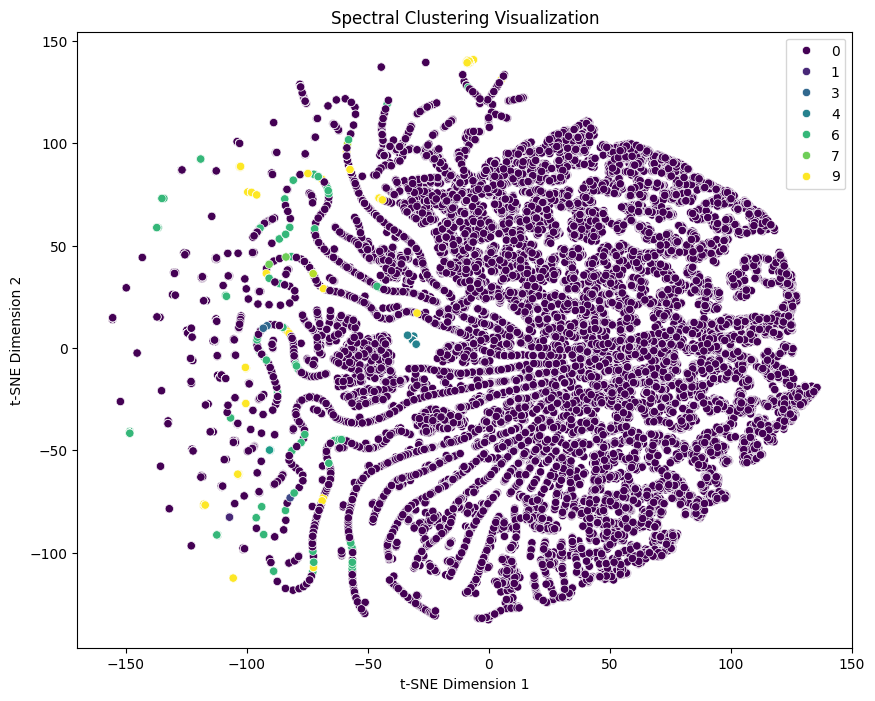

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(data_filtered_scaled[['Completed', 'Rewatched', 'Watching']])

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=labels, palette="viridis")
plt.title("Spectral Clustering Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

In [31]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=15, affinity='nearest_neighbors')

# Fit the model to the data
spectral.fit(data_filtered_scaled.drop('Mal ID', axis=1))

labels = spectral.labels_
cluster_sizes = pd.Series(labels).value_counts().sort_index()
print("Cluster Sizes:", cluster_sizes)

/Users/ramachandrank/Repos/MS/sem1/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Cluster Sizes: 0     26290
1       255
2        30
3        16
4      7210
5       169
6       171
7       205
8        30
9        30
10       65
11       16
12      382
13     5435
14       11
Name: count, dtype: int64


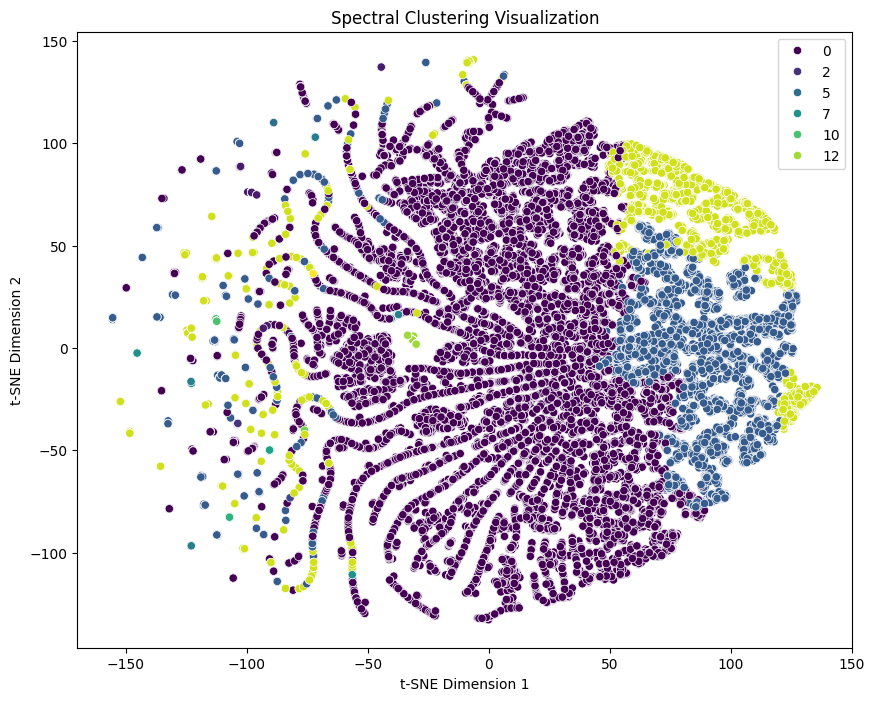

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(data_filtered_scaled[['Completed', 'Rewatched', 'Watching']])

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=labels, palette="viridis")
plt.title("Spectral Clustering Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

In [33]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=20, affinity='nearest_neighbors')

# Fit the model to the data
spectral.fit(data_filtered_scaled.drop('Mal ID', axis=1))

labels = spectral.labels_
cluster_sizes = pd.Series(labels).value_counts().sort_index()
print("Cluster Sizes:", cluster_sizes)

/Users/ramachandrank/Repos/MS/sem1/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Cluster Sizes: 0        50
1     30126
2        30
3       382
4        16
5        16
6       263
7       109
8        22
9      8883
10       16
11       28
12      101
13       22
14       30
15       11
16       43
17       44
18       29
19       94
Name: count, dtype: int64


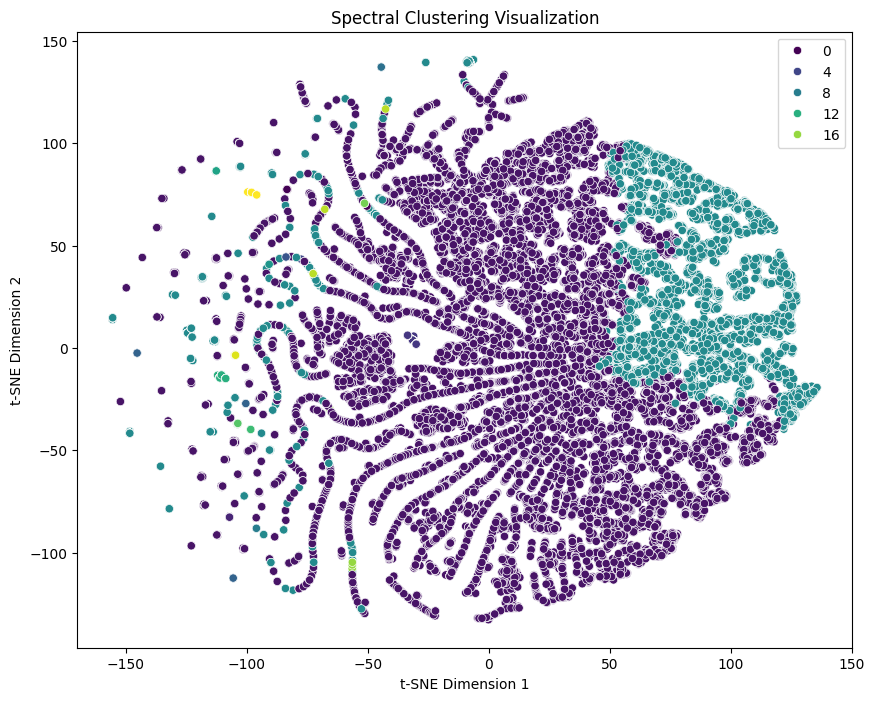

In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(data_filtered_scaled[['Completed', 'Rewatched', 'Watching']])

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=labels, palette="viridis")
plt.title("Spectral Clustering Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

With either of the clustering methods, a few few clusters end up being too lage as compared to the other clusters. HDBSCAN provided much stable solutions.

Agglomorative clustering provided comparitively better solutions with mostly balanced clusters except for 1.